In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
figures_path <- file.path("../figures/NF0014/")
if (!dir.exists(figures_path)) {
  dir.create(figures_path, recursive = TRUE)
}

In [3]:
umap_results <- arrow::read_parquet("../results/NF0014/3.organoid_fs_profiles_umap.parquet")
head(umap_results)

patient,object_id,unit,dose,treatment,image_set,Well,MOA,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NF0014,40,uM,10,Mirdametinib,G8-1,G8,MEK1/MEK2 Inhibitor,2.0592527,3.0605676
NF0014,24,uM,1,Fimepinostat,D5-1,D5,PI3K and HDAC inhibitor,0.7095713,-0.5088036
NF0014,85,uM,1,Mirdametinib,F8-1,F8,MEK1/MEK2 Inhibitor,-0.3473186,3.2714994
NF0014,18,nM,10,STAURO,G11-1,G11,Apoptosis,2.4931569,1.6196111
NF0014,24,uM,1,Binimetinib,G7-1,G7,MEK1/MEK2 Inhibitor,1.0814865,3.3740375
NF0014,30,uM,1,Copanlisib,E3-2,E3,PI3K Inhibitor,1.1907700,2.8520553


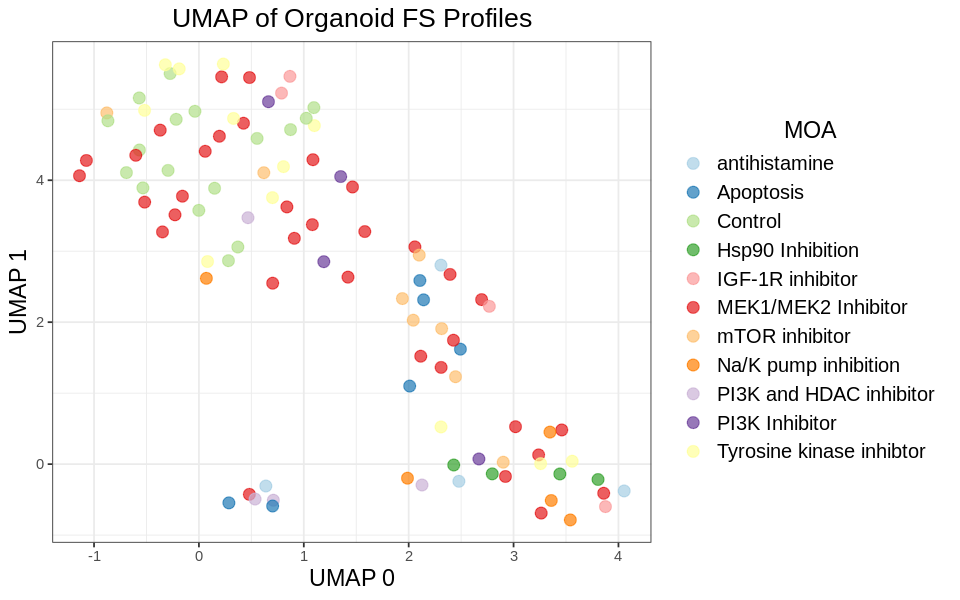

In [4]:
width <- 8
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results, aes(x = UMAP1, y = UMAP2, color = MOA))
    + geom_point(size = 3, alpha = 0.7)
    + scale_color_brewer(palette = "Paired")
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
)
ggsave(umap_organoid_plot, file = "../figures/NF0014/umap_organoid_profiles.png", width = width, height = height, dpi = 300)
umap_organoid_plot


In [8]:
head(umap_results)

patient,object_id,unit,dose,treatment,image_set,Well,MOA,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NF0014,40,uM,10,Mirdametinib,G8-1,G8,MEK1/MEK2 Inhibitor,2.0592527,3.0605676
NF0014,24,uM,1,Fimepinostat,D5-1,D5,PI3K and HDAC inhibitor,0.7095713,-0.5088036
NF0014,85,uM,1,Mirdametinib,F8-1,F8,MEK1/MEK2 Inhibitor,-0.3473186,3.2714994
NF0014,18,nM,10,STAURO,G11-1,G11,Apoptosis,2.4931569,1.6196111
NF0014,24,uM,1,Binimetinib,G7-1,G7,MEK1/MEK2 Inhibitor,1.0814865,3.3740375
NF0014,30,uM,1,Copanlisib,E3-2,E3,PI3K Inhibitor,1.1907700,2.8520553


In [ ]:
width <- 8
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results, aes(x = UMAP1, y = UMAP2, color = MOA))
    + geom_point(size = 3, alpha = 0.7)
    + scale_color_brewer(palette = "Paired")
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
)
# ggsave(umap_organoid_plot, file = "../figures/NF0014/umap_organoid_profiles.png", width = width, height = height, dpi = 300)
umap_organoid_plot



patient,object_id,unit,dose,treatment,image_set,Well,parent_organoid,MOA,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
NF0014,70,uM,10,Mirdametinib,G8-1,G8,40,MEK1/MEK2 Inhibitor,3.803937,7.678593
NF0014,122,uM,10,Mirdametinib,G8-1,G8,40,MEK1/MEK2 Inhibitor,3.805405,7.645585
NF0014,162,uM,10,Mirdametinib,G8-1,G8,40,MEK1/MEK2 Inhibitor,3.753702,7.637684
NF0014,165,uM,10,Mirdametinib,G8-1,G8,40,MEK1/MEK2 Inhibitor,3.830318,7.654173
NF0014,182,uM,10,Mirdametinib,G8-1,G8,40,MEK1/MEK2 Inhibitor,3.806508,7.670638
NF0014,220,uM,10,Mirdametinib,G8-1,G8,40,MEK1/MEK2 Inhibitor,3.817652,7.597888


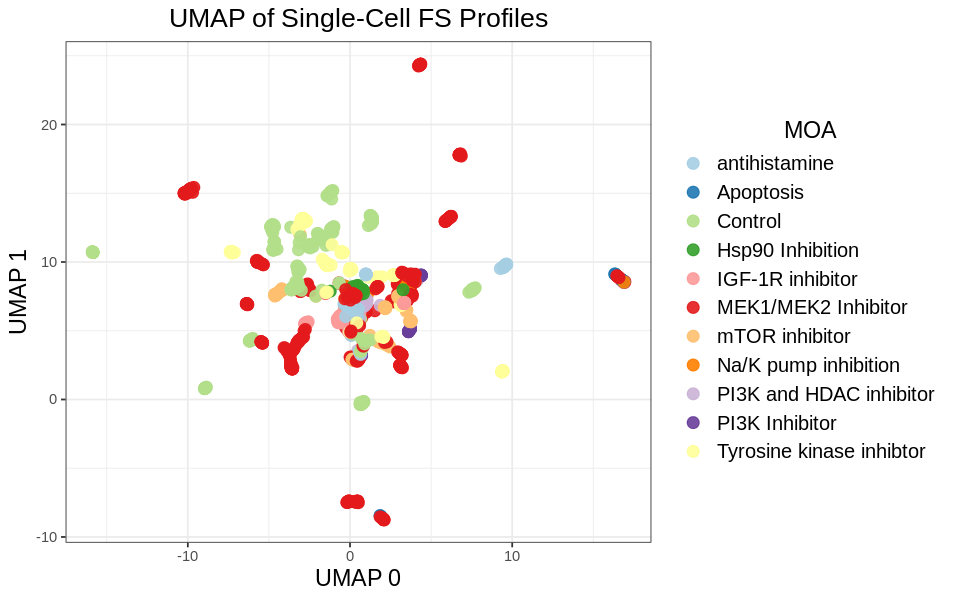

In [5]:
umap_sc_results <- arrow::read_parquet('../results/NF0014/3.sc_fs_profiles_umap.parquet')
head(umap_sc_results)
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = MOA))
    + geom_point(size = 3, alpha = 0.9)
    + scale_color_brewer(palette = "Paired")
    + labs(title = "UMAP of Single-Cell FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
)
ggsave(umap_sc_plot, file = "../figures/NF0014/umap_sc_profiles.png", width = width, height = height, dpi = 300)

umap_sc_plot


In [6]:
# custom color palette - continuous
custom_palette <- colorRampPalette(c("blue", "green", "yellow"))
custom_colors <- custom_palette(200)
# make the scale continuous
custom_colors <- circlize::colorRamp2(seq(0, 1, length.out = 200), custom_colors)

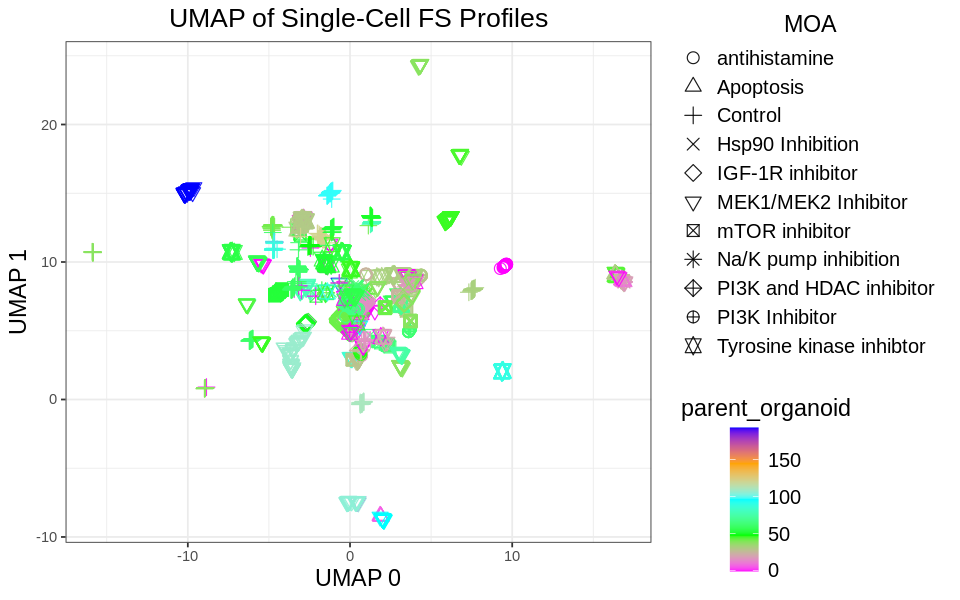

In [7]:
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = parent_organoid, shape = MOA))
    + geom_point(size = 3, alpha = 0.9)
    # add  custom color scale
    + scale_color_gradientn(colors = c("magenta", "green", "cyan", "orange", "blue"))
    + scale_shape_manual(values = c(
        1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
        ))  # different shapes for each MOA
    + labs(title = "UMAP of Single-Cell FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
)
ggsave(umap_sc_plot, file = "../figures/NF0014/umap_sc_profiles_colored_by_parent_organoid.png", width = width, height = height, dpi = 300)

umap_sc_plot
